In [118]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import random
import matplotlib.pyplot as plt

##### Welcome! This cheatsheet in Python is a great tool to review the fundamentals of statistics independently from your level, as it is always useful to refresh those concepts. We will cover the different measures of central tendency, measures of volatility, descriptive statistics and correlations concepts.


##### While we recommend you to go through each concept, here are some of the most importants to us:


- Arithmetic Mean > Geometric mean > Harmonic Mean


- The **standard deviation** is the positive square root of the **sample variance**


- The **population variance** have the same formula as the sample variance but use 𝑛 in the denominator instead of 𝑛 − 1. (ddof = 0)


- The **population standard deviation** is the positive square root of the population variance.


- **Negative Skewness** -> Dominant tail on the left side. **Positive skewness** -> longer or fatter tail on the right side. Skewness is close to 0 (between −0.5 and 0.5) -> dataset is considered quite **symmetrical**.


- **Variance** refers to the spread of a data set around its mean value, while a **covariance** refers to the measure of the directional relationship between two random variables.


- The **Covariance** quantify the strength and direction of a relationship between a pair of variables whereas we can think of the **Correlation coefficient (or Pearson product-moment correlation coefficient)** as a standardized covariance. (Covariance shows you how the two variables differ, whereas correlation shows you how the two variables are related)


- **Correlation coefficient = Covariance / (std_x * std_y)**

# Statistics concepts

## Measure of central tendency
The measures of central tendency show the central or middle values of datasets. There are several definitions of what’s considered to be the center of a dataset.
- **Mean**: The sample mean, also called the sample arithmetic mean or simply the average, is the arithmetic average of all the items in a dataset. The mean of a dataset 𝑥 is mathematically expressed as Σᵢ𝑥ᵢ/𝑛, where 𝑖 = 1, 2, …, 𝑛. In other words, it’s the sum of all the elements 𝑥ᵢ divided by the number of items in the dataset 𝑥. The important disadvantage of mean is that it is sensitive to extreme values/outliers, especially when the sample size is small. Therefore, it is not an appropriate measure of central tendency for skewed distribution.


- **Weighted mean**: The weighted mean, also called the weighted arithmetic mean or weighted average, is a generalization of the arithmetic mean that enables you to define the relative contribution of each data point to the result. You define one weight 𝑤ᵢ for each data point 𝑥ᵢ of the dataset 𝑥, where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in 𝑥. Then, you multiply each data point with the corresponding weight, sum all the products, and divide the obtained sum with the sum of weights: Σᵢ(𝑤ᵢ𝑥ᵢ) / Σᵢ𝑤ᵢ.


- **Harmonic mean**: The harmonic mean is the reciprocal of the mean of the reciprocals of all items in the dataset: 𝑛 / Σᵢ(1/𝑥ᵢ), where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in the dataset 𝑥. HM is appropriate in situations where the reciprocals of values are more useful. HM is used when we want to determine the average sample size of a number of groups, each of which has a different sample size.


- **Geometric mean**: The geometric mean is the 𝑛-th root of the product of all 𝑛 elements 𝑥ᵢ in a dataset 𝑥: ⁿ√(Πᵢ𝑥ᵢ), where 𝑖 = 1, 2, …, 𝑛. GM is an appropriate measure when values change exponentially and in case of skewed distribution that can be made symmetrical by a log transformation. GM is more commonly used in microbiological and serological research. One important disadvantage of GM is that it cannot be used if any of the values are zero or negative.


- **Median**: The sample median is the middle element of a sorted dataset. The dataset can be sorted in increasing or decreasing order. If the number of elements 𝑛 of the dataset is odd, then the median is the value at the middle position: 0.5(𝑛 + 1). If 𝑛 is even, then the median is the arithmetic mean of the two values in the middle, that is, the items at the positions 0.5𝑛 and 0.5𝑛 + 1. The main difference between the behavior of the mean and median is related to dataset outliers or extremes. The mean is heavily affected by outliers, but the median only depends on outliers either slightly or not at all.


- **Mode**: The sample mode is the value in the dataset that occurs most frequently. If there isn’t a single such value, then the set is multimodal since it has multiple modal values. For example, in the set that contains the points 2, 3, 2, 8, and 12, the number 2 is the mode because it occurs twice, unlike the other items that occur only once.


*Additional notes*: If all the values in a data set are the same, then all the three means (arithmetic mean, GM and HM) will be identical. As the variability in the data increases, the difference among these means also increases. Arithmetic mean is always greater than the GM, which in turn is always greater than the HM.

In [63]:
random.seed(7) # Create a fixed state 

In [103]:
# To create a list of random integer values:
x = random.sample(range(0, 100), 100) # parameter can't be higher or lower than the range

# To create a list of random float numbers:
y = np.random.uniform(0, 100, 100) # same as before

# To create a list with a population of 1000 between 1 and 100 
z = random.choices(range(1,100), k=1000)

aList = [3,2,5,5.5,6.5,9]
weights = [0.1,0.15,0.20,0.05,0.3,0.2]

In [104]:
#mean
mean_1 = sum(aList) / len(aList)
mean_2 = statistics.mean(aList) # With built in function
mean_3 = statistics.fmean(aList) # Introduce in python 3.8 and faster alternative to statistics.mean()
mean_4 = np.mean(aList) #using numpy
print("sample arithmetic mean methods results: ",mean_1, mean_2, mean_3, mean_4)

sample arithmetic mean methods results:  5.166666666666667 5.166666666666667 5.166666666666667 5.166666666666667


In [105]:
# weighted mean
#weights = np.random.uniform(1, 3, 100)
# if we want the sum of the weights equal to one we can use:
# np.random.dirichlet(np.ones(100),size=1)
wmean_1 = wmean = sum(weights[i] * aList[i] for i in range(len(aList))) / sum(weights)
wmean_2 = np.average(aList, weights=pd.Series(weights))
wmean_3 = sum(x_ * w_ for (x_, w_) in zip(aList, weights)) / sum(weights)
wmean_4 = np.average(aList, weights=weights)
# if dataset contains NaN values, the output of this mean will be NaN
print("Weighted mean methods results: ",wmean_1, wmean_2, wmean_3)

Weighted mean methods results:  5.625 5.625 5.625


In [106]:
# Harmonic mean
hmean_1 = len(aList) / sum(1 / item for item in aList)
hmean_2 = statistics.harmonic_mean(aList)
hmean_3 = scipy.stats.hmean(aList)
print("Harmonic mean methods results: ",hmean_1, hmean_2, hmean_3)

Harmonic mean methods results:  4.053756102682555 4.053756102682556 4.053756102682555


In [107]:
# Geometric Mean
gmean_1 = statistics.geometric_mean(aList)
gmean_2 = scipy.stats.gmean(aList)
gmean_3 = 1
for item in aList:
    gmean_3 *= item

gmean_3 **= 1 / len(aList)
print("Geometric mean methods results: ",gmean_1, gmean_2, gmean_3)

Geometric mean methods results:  4.614308586663473 4.614308586663473 4.614308586663472


In [113]:
# Sample Median = Median
# Try with odd and even list to fully understand
n = len(aList)
if n % 2:
    median_1 = sorted(aList)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(aList), round(0.5 * n)
    median_1 = 0.5 * (x_ord[index-1] + x_ord[index])
median_2 = statistics.median(aList)
median_3 = statistics.median_high(aList) # instead of doing the mean of the two middle values we take the higher one
median_4 = statistics.median_low(aList) # same with lower one
median_5 = np.median(aList)
print("Sample median methods results: ",median_1, median_2, median_3, median_4, median_5)

Sample median methods results:  5.25 5.25 5.5 5 5.25


In [116]:
# Mode
aListMode = [3,2,5,5.5,2,6.5,9]
mode_1 = max((aListMode.count(item), item) for item in set(aListMode))[1]
mode_2 = statistics.mode(aListMode)
mode_3 = statistics.multimode(aListMode) # returns a list. If more than one result return all of the results
print("Sample median methods results: ",mode_1, mode_2, mode_3)

Sample median methods results:  2 2 [2]


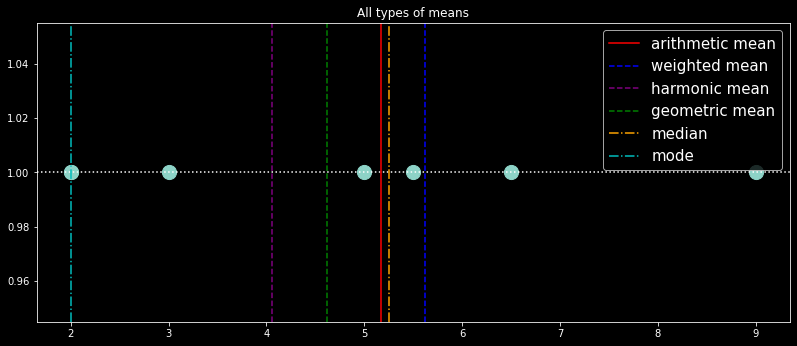

In [186]:
#x_values = [0, 1, 4, 9]
fig = plt.figure()
#plt.plot(aListMode, range(len(aList)))
plt.style.use('dark_background')
plt.axhline(y = 1, xmin = 0, xmax = 10, color = 'w', linestyle = ':')
plt.scatter(aListMode,[1,1,1,1,1,1,1], s=200)

# plot the types of means
plt.axvline(x=mean_1,color='r',label="arithmetic mean", linestyle='-')
plt.axvline(x=wmean_1,color='b',label="weighted mean", linestyle='--')
plt.axvline(x=hmean_1,color='purple',label="harmonic mean", linestyle='--')
plt.axvline(x=gmean_1,color='g',label="geometric mean", linestyle='--')
plt.axvline(x=median_1,color='orange',label="median", linestyle='-.')
plt.axvline(x=mode_1,color='c',label="mode", linestyle='-.')

# parameters of the fig
fig.set_size_inches(13.5, 5.5, forward=True)
plt.rcParams['legend.fontsize'] = 15

# print the plot
plt.title("All types of means")
plt.legend()
plt.show()

https://scipy-lectures.org/packages/statistics/auto_examples/plot_iris_analysis.html#sphx-glr-packages-statistics-auto-examples-plot-iris-analysis-py

## Measures of Variability

The measures of central tendency aren’t sufficient to describe data. You’ll also need the measures of variability that quantify the spread of data points.


- **Variance**: The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean. You can express the sample variance of the dataset 𝑥 with 𝑛 elements mathematically as 𝑠² = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1), where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥. Why do why divide by n-1 and not just n? -> Bessel's correction: In statistics, Bessel's correction is the use of n − 1 instead of n in the formula for the sample variance and sample standard deviation, where n is the number of observations in a sample. This method corrects the bias in the estimation of the population variance. It also partially corrects the bias in the estimation of the population standard deviation. However, the correction often increases the mean squared error in these estimations. This technique is named after Friedrich Bessel.


- **Standard Deviation**: The sample standard deviation is another measure of data spread. It’s connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance. The standard deviation is often more convenient than the variance because it has the same unit as the data points.


- **Skewness**: The sample skewness measures the asymmetry of a data sample. There are several mathematical definitions of skewness. One common expression to calculate the skewness of the dataset 𝑥 with 𝑛 elements is (𝑛² / ((𝑛 − 1)(𝑛 − 2))) (Σᵢ(𝑥ᵢ − mean(𝑥))³ / (𝑛𝑠³)). A simpler expression is Σᵢ(𝑥ᵢ − mean(𝑥))³ 𝑛 / ((𝑛 − 1)(𝑛 − 2)𝑠³), where 𝑖 = 1, 2, …, 𝑛 and mean(𝑥) is the sample mean of 𝑥. The skewness defined like this is called the adjusted Fisher-Pearson standardized moment coefficient.

    Usually, negative skewness values indicate that there’s a dominant tail on the left side. Positive skewness values correspond to a longer or fatter tail on the right sid. If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.


- **Percentiles**: The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value. If there are two such elements in the dataset, then the sample 𝑝 percentile is their arithmetic mean. Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:

    The first quartile is the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.
    
    The second quartile is the sample 50th percentile or the median. Approximately 25% of the items lie between the first and second quartiles and another 25% between the second and third quartiles.
    
    The third quartile is the sample 75th percentile. It divides roughly 25% of the largest items from the rest of the dataset.


- **Ranges**: The range of data is the difference between the maximum and minimum element in the dataset. 

*Notes*: 

You calculate the **population variance** similarly to the sample variance. However, you have to use 𝑛 in the denominator instead of 𝑛 − 1: Σᵢ(𝑥ᵢ − mean(𝑥))² / 𝑛. In this case, 𝑛 is the number of items in the entire population. You can get the population variance similar to the sample variance, with the following differences:
- Replace (n - 1) with n in the pure Python implementation.
- Use statistics.pvariance() instead of statistics.variance().
- Specify the parameter ddof=0 if you use NumPy or Pandas. In NumPy, you can omit ddof because its default value is 0.
Note that you should always be aware of whether you’re working with a sample or the entire population whenever you’re calculating the variance!

The **population standard deviation** refers to the entire population. It’s the positive square root of the population variance. You can calculate it just like the sample standard deviation, with the following differences:
-  Find the square root of the population variance in the pure Python implementation.
- Use statistics.pstdev() instead of statistics.stdev().
- Specify the parameter ddof=0 if you use NumPy or Pandas. In NumPy, you can omit ddof because its default value is 0.

In [197]:
# Variance
# If NaN values in list then result is NaN. To skip NaN values we can do: np.nanvar(aListWithNaN, ddof=1)
n = len(aList)
mean_ = sum(aList) / n
var_1 = sum((item - mean_)**2 for item in aList) / (n - 1)
var_2 = statistics.variance(aList)
var_3 = np.var(aList, ddof=1)
var_4 = pd.Series(aList).var(ddof=1) # can't just give it a list
# It’s very important to specify the parameter ddof=1. That’s how you set the delta degrees of freedom to 1. 
# This parameter allows the proper calculation of 𝑠², with (𝑛 − 1) in the denominator instead of 𝑛.

print("Sample Variance methods results: ",round(var_1,2), round(var_2,2), round(var_3,2), round(var_4,2))

Sample Variance methods results:  6.27 6.27 6.27 6.27


In [200]:
# Standard deviation
std_1 = var_1 ** 0.5
std_2 = statistics.stdev(aList)
std_3 = np.std(aList, ddof=1)
std_4 = pd.Series(aList).std(ddof=1)

print("Sample Variance methods results: ",round(std_1,2), round(std_2,2), round(std_3,2), round(std_4,2))

Sample Variance methods results:  2.5 2.5 2.5 2.5


In [208]:
# Skewness
n = len(aList)
mean_ = sum(aList) / n
var_ = sum((item - mean_)**2 for item in aList) / (n - 1)
std_ = var_ ** 0.5
skew_1 = (sum((item - mean_) ** 3 for item in aList)
         * n / ((n - 1) * (n - 2) * std_**3))
skew_2 = scipy.stats.skew(aList, bias=False) # The parameter bias is set to False to enable the corrections for statistical bias
skew_3 = pd.Series(aList).skew()

print("Sample skewness methods results: ",round(skew_1,2), round(skew_2,2), round(skew_3,2))

Sample skewness methods results:  0.32 0.32 0.32 2.5


In [221]:
# Percentiles
# The parameter n defines the number of resulting equal-probability percentiles, and method determines how to calculate them.
# statistics.quantiles(x, n=2) for median
perc_1 = statistics.quantiles(aList, n=4, method = "inclusive") # or exclusive
perc_2 = np.percentile(aList, 5)
perc_3 = np.percentile(aList, 95)
perc_4 = np.percentile(aList, [25,50,75])
# to ignore nan values use np.nanpercentile()

#np.quantile(aList, 0.05)
#np.quantile(aList, 0.95)
#np.quantile(aList, [0.25, 0.5, 0.75])

print("Sample skewness methods results: ",perc_1, perc_2, perc_3, perc_4)

Sample skewness methods results:  [3.5, 5.25, 6.25] 2.25 8.375 [3.5  5.25 6.25]


In [222]:
# Ranges
range_1 = max(aList) - min(aList)
range_2 = np.ptp(aList)
print("Sample skewness methods results: ",range_1, range_2)

Sample skewness methods results:  7 7.0


## Summary of Descriptive Statistics


In [224]:
# Summary
result = scipy.stats.describe(aList, ddof=1, bias=False)
# You have to provide the dataset as the first argument. 
# The argument can be a NumPy array, list, tuple, or similar data structure. 
# You can omit ddof=1 since it’s the default and only matters when you’re calculating the variance. 
# You can pass bias=False to force correcting the skewness and kurtosis for statistical bias.
result

DescribeResult(nobs=6, minmax=(2.0, 9.0), mean=5.166666666666667, variance=6.2666666666666675, skewness=0.3213802888775671, kurtosis=-0.1593622679945681)

## Measures of Correlation Between Pairs of Data
You’ll often need to examine the relationship between the corresponding elements of two variables in a dataset. Say there are two variables, 𝑥 and 𝑦, with an equal number of elements, 𝑛. Let 𝑥₁ from 𝑥 correspond to 𝑦₁ from 𝑦, 𝑥₂ from 𝑥 to 𝑦₂ from 𝑦, and so on. You can then say that there are 𝑛 pairs of corresponding elements: (𝑥₁, 𝑦₁), (𝑥₂, 𝑦₂), and so on.

You’ll see the following measures of correlation between pairs of data:

Positive correlation exists when larger values of 𝑥 correspond to larger values of 𝑦 and vice versa.
Negative correlation exists when larger values of 𝑥 correspond to smaller values of 𝑦 and vice versa.
Weak or no correlation exists if there is no such apparent relationship.

Note: There’s one important thing you should always have in mind when working with correlation among a pair of variables, and that’s that correlation is not a measure or indicator of causation, but only of association!

The two statistics that measure the correlation between datasets are **covariance** and the **correlation coefficient**. Let’s define some data to work with these measures.

**Covariance**: The sample covariance is a measure that quantifies the strength and direction of a relationship between a pair of variables:

- If the correlation is positive, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
- If the correlation is negative, then the covariance is negative, as well. A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
- If the correlation is weak, then the covariance is close to zero.


The covariance of the variables 𝑥 and 𝑦 is mathematically defined as 𝑠ˣʸ = Σᵢ (𝑥ᵢ − mean(𝑥)) (𝑦ᵢ − mean(𝑦)) / (𝑛 − 1), where 𝑖 = 1, 2, …, 𝑛, mean(𝑥) is the sample mean of 𝑥, and mean(𝑦) is the sample mean of 𝑦. It follows that the covariance of two identical variables is actually the variance: 𝑠ˣˣ = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1) = (𝑠ˣ)² and 𝑠ʸʸ = Σᵢ(𝑦ᵢ − mean(𝑦))² / (𝑛 − 1) = (𝑠ʸ)².
    
**Correlation Coefficient**: The correlation coefficient, or Pearson product-moment correlation coefficient, is denoted by the symbol 𝑟. The coefficient is another measure of the correlation between data. You can think of it as a standardized covariance. Here are some important facts about it:

- The value 𝑟 > 0 indicates positive correlation.
- The value 𝑟 < 0 indicates negative correlation.
- The value r = 1 is the maximum possible value of 𝑟. It corresponds to a perfect positive linear relationship between variables.
- The value r = −1 is the minimum possible value of 𝑟. It corresponds to a perfect negative linear relationship between variables.
- The value r ≈ 0, or when 𝑟 is around zero, means that the correlation between variables is weak.


The mathematical formula for the correlation coefficient is 𝑟 = 𝑠ˣʸ / (𝑠ˣ𝑠ʸ) where 𝑠ˣ and 𝑠ʸ are the standard deviations of 𝑥 and 𝑦 respectively. If you have the means (mean_x and mean_y) and standard deviations (std_x, std_y) for the datasets x and y, as well as their covariance cov_xy, then you can calculate the correlation coefficient with pure Python

In [226]:
# create x and y
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

In [230]:
# Covariance
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy_1 = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))
          / (n - 1))
cov_matrix = np.cov(x_, y_)

# Note that cov() has the optional parameters bias, which defaults to False, and ddof, which defaults to None. 
# Their default values are suitable for getting the sample covariance matrix. 
# The upper-left element of the covariance matrix is the covariance of x and x, or the variance of x. 
# Similarly, the lower-right element is the covariance of y and y, or the variance of y. 
# You can check to see that this is true:

var_x = x_.var(ddof=1)
var_y = y_.var(ddof=1)
# The other two elements of the covariance matrix are equal and represent the actual covariance between x and y.
# Pandas have this function to calculate the covariance:
cov_xy_2 = x__.cov(y__)
cov_xy_3 = y__.cov(x__)
print("Covariance methods results: ",cov_xy_1, cov_matrix, var_x, var_y, cov_xy_2, )

Covariance methods results:  19.95 [[38.5        19.95      ]
 [19.95       13.91428571]] 38.5 13.914285714285711 19.95


In [233]:
# Coefficient correlation
cov_xy = y__.cov(x__)
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r_1 = cov_xy / (std_x * std_y)

# scipy.stats has the routine pearsonr() that calculates the correlation coefficient and the 𝑝-value
r_2, p = scipy.stats.pearsonr(x_, y_)

# Similar to the case of the covariance matrix, you can apply np.corrcoef() 
# with x_ and y_ as the arguments and get the correlation coefficient matrix
corr_matrix = np.corrcoef(x_, y_)
# The upper-left element is the correlation coefficient between x_ and x_. 
# The lower-right element is the correlation coefficient between y_ and y_. 
# Their values are equal to 1.0. 
# The other two elements are equal and represent the actual correlation coefficient between x_ and y_.

LinregressResult = scipy.stats.linregress(x_, y_)

r_3 = x__.corr(y__)

print("Coefficient correlation methods results: ",r_1, r_2, p, corr_matrix, r_3)

Coefficient correlation methods results:  0.861950005631606 0.8619500056316061 5.122760847201135e-07 [[1.         0.86195001]
 [0.86195001 1.        ]] 0.8619500056316061
